<a href="https://colab.research.google.com/github/LerinaMM/brent_crude_oil/blob/main/brent_crude_oil_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análise Preco do Petroleo Bruto

- Vamos utilizar Séries Temporais para prever o comportamento do preço do Petroleo
- Faremos uma analise utilizando a biblioteca Pycaret
- Vamos utilizar a Biblioteca Pycaret para realizar a previsão do preço do Petróleo nos próximos 24 meses

# 2. Motivação da analise


*   realizamos uma primeira analise sobre commodities que esta disponivel no endereço https://github.com/LerinaMM/commodities onde mostrou no grafico do Brent Crude OIl que o preço da commodity chegava aos menores valores históricos.
*   Nessa analise mostrou que as maiores baixas do preço do petroleo ocorrem num intervalo a cada 5 anos dessa forma gostariamos, através dessa analise, confirmar se esse comportamento se repete nos proximos 4 anos e verificar se teria algum fator para tal comportamento

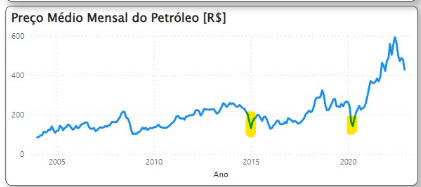

# 3. Vamos utilizar o Yahoo Finance para captar dados do mercado financeiro

O YFinance oferece uma maneira segmentada e Pythonic de baixar dados do mercado do Yahoo finanças

In [3]:
!pip install yfinance --upgrade --no-cache-dir

In [4]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 70.8 MB/s et

#3. Importando as Bibliotecas

In [5]:
# Pacotes para análises de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes para análises gráficas
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Função para data
from datetime import datetime

# Pacotes para calculos estatísticos
import scipy

#YFinance (dados do mercado financeiro)
import yfinance as yf
yf.pdr_override()

#Avisos
import warnings
warnings.filterwarnings("ignore")

# Imports para formatação dos dados
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# Formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format


#4. Coletando os dados da API Yahoo Finance e realizando a escolha do período de tempo

In [6]:
#Coletando dados da API da Yahoo Finance - Buscamos o código do ativo e escolhemos o período a ser analisado
#Exemplos de períodos de tempos: (1d, 5d, 3mo, 6mo, 1y, 2y, 5y e ytd)

Dados = web.get_data_yahoo('BZ=F', period='15y')

#Shape
Dados.shape

[*********************100%%**********************]  1 of 1 completed


(3716, 6)

In [7]:
#Verificando os dados
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-11-06,61.12,61.21,56.81,57.43,57.43,1167
2008-11-07,57.59,59.07,57.19,57.35,57.35,515
2008-11-10,61.59,61.61,56.14,59.08,59.08,980
2008-11-11,57.11,57.54,54.98,55.71,55.71,723
2008-11-12,55.62,55.62,52.00,52.37,52.37,290


In [8]:
# Registros mais recentes
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-31,87.81,88.53,87.41,87.41,87.41,35673
2023-11-01,85.45,87.22,84.56,84.63,84.63,36235
2023-11-02,84.94,87.03,84.61,86.85,86.85,31512
2023-11-03,86.86,87.78,84.55,84.89,84.89,31512
2023-11-06,85.39,86.29,84.91,85.98,85.98,3734


In [9]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3716 entries, 2008-11-06 to 2023-11-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3716 non-null   float64
 1   High       3716 non-null   float64
 2   Low        3716 non-null   float64
 3   Close      3716 non-null   float64
 4   Adj Close  3716 non-null   float64
 5   Volume     3716 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 203.2 KB


##4.1 Retirando as colunas - Open, High, Low, Volume, Adj Close que nao serão utilizadas nas análises

In [10]:
Dados.drop(columns=["Open","High","Low","Volume","Adj Close"],inplace=True)

In [11]:
Dados

,Close
Date,
2008-11-06,57.43
2008-11-07,57.35
2008-11-10,59.08
2008-11-11,55.71
2008-11-12,52.37
...,...
2023-10-31,87.41
2023-11-01,84.63
2023-11-02,86.85


##4.2 Obter a primeira e a última data do dataset

In [12]:
#Observar o range de dados

print('Menor data:', Dados.index.min())
print('Maior data:', Dados.index.max())

Menor data: 2008-11-06 00:00:00
Maior data: 2023-11-06 00:00:00


#5. Transformando o Data Frame para series

In [13]:
Dados_series=pd.Series(Dados.Close)

In [14]:
Dados_series.index

DatetimeIndex(['2008-11-06', '2008-11-07', '2008-11-10', '2008-11-11',
               '2008-11-12', '2008-11-14', '2008-11-17', '2008-11-18',
               '2008-11-19', '2008-11-20',
               ...
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-06'],
              dtype='datetime64[ns]', name='Date', length=3716, freq=None)

## 5.1 Passando para uma frequencia para diária que a operação de setup necessita

In [15]:
Dados_series.resample("D").mean().dropna()

Date
2008-11-06   57.43
2008-11-07   57.35
2008-11-10   59.08
2008-11-11   55.71
2008-11-12   52.37
              ... 
2023-10-31   87.41
2023-11-01   84.63
2023-11-02   86.85
2023-11-03   84.89
2023-11-06   85.98
Name: Close, Length: 3716, dtype: float64

In [16]:
Dados_series=Dados_series.resample("D").mean()

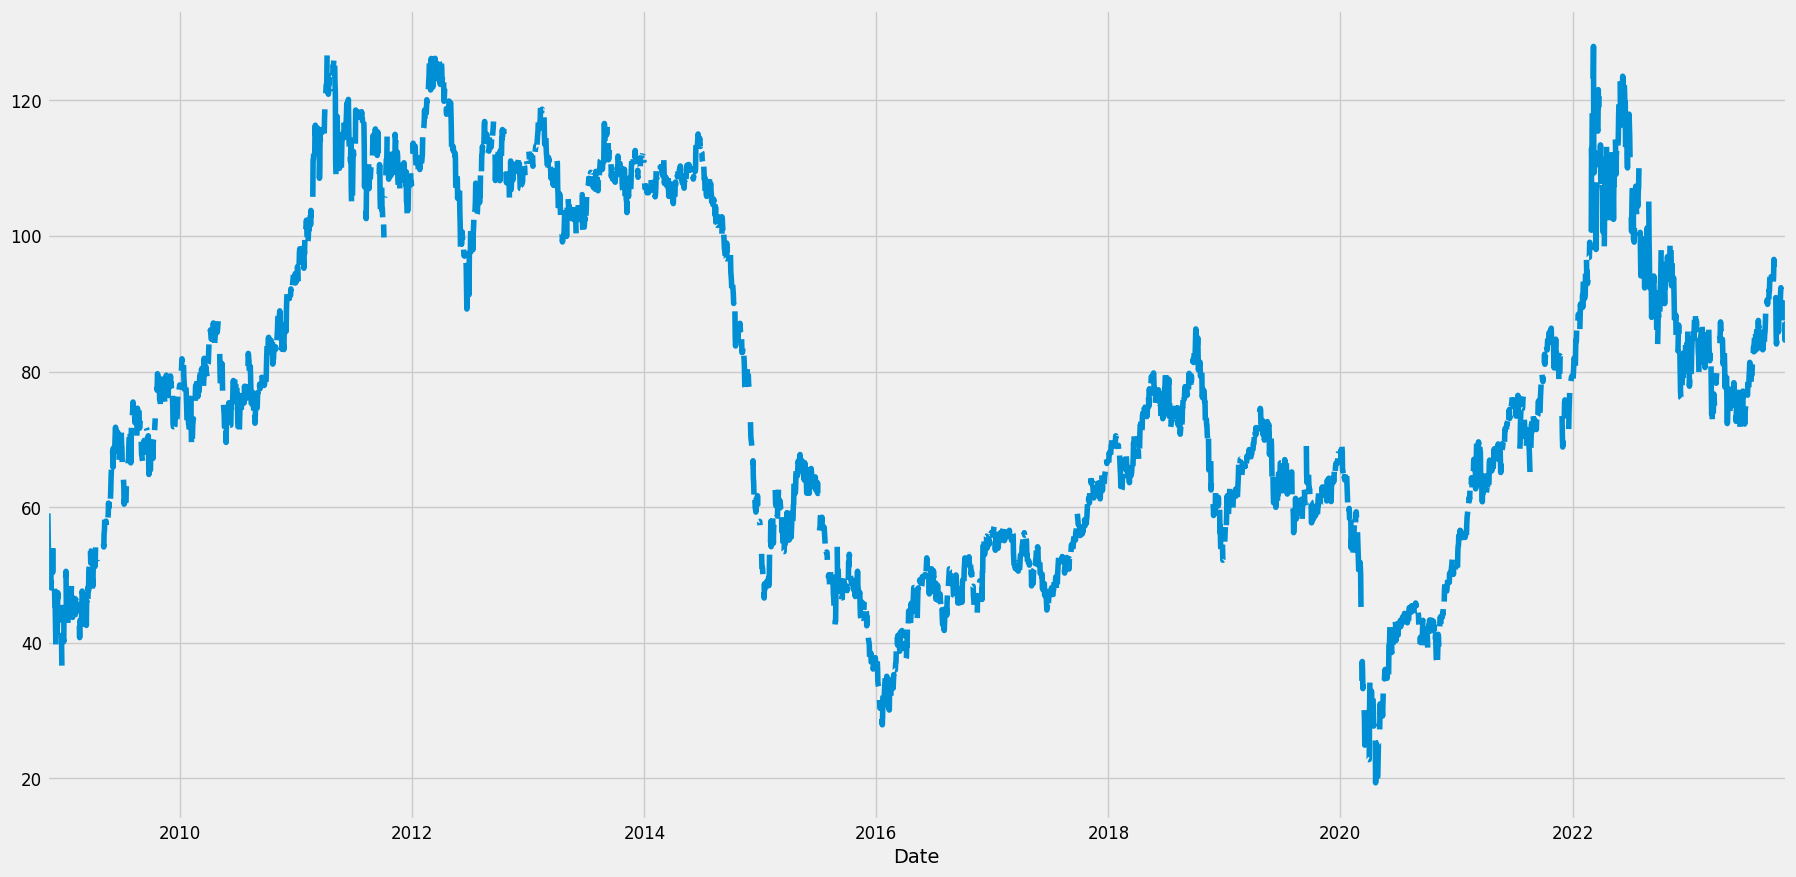

In [17]:
Dados_series.plot();

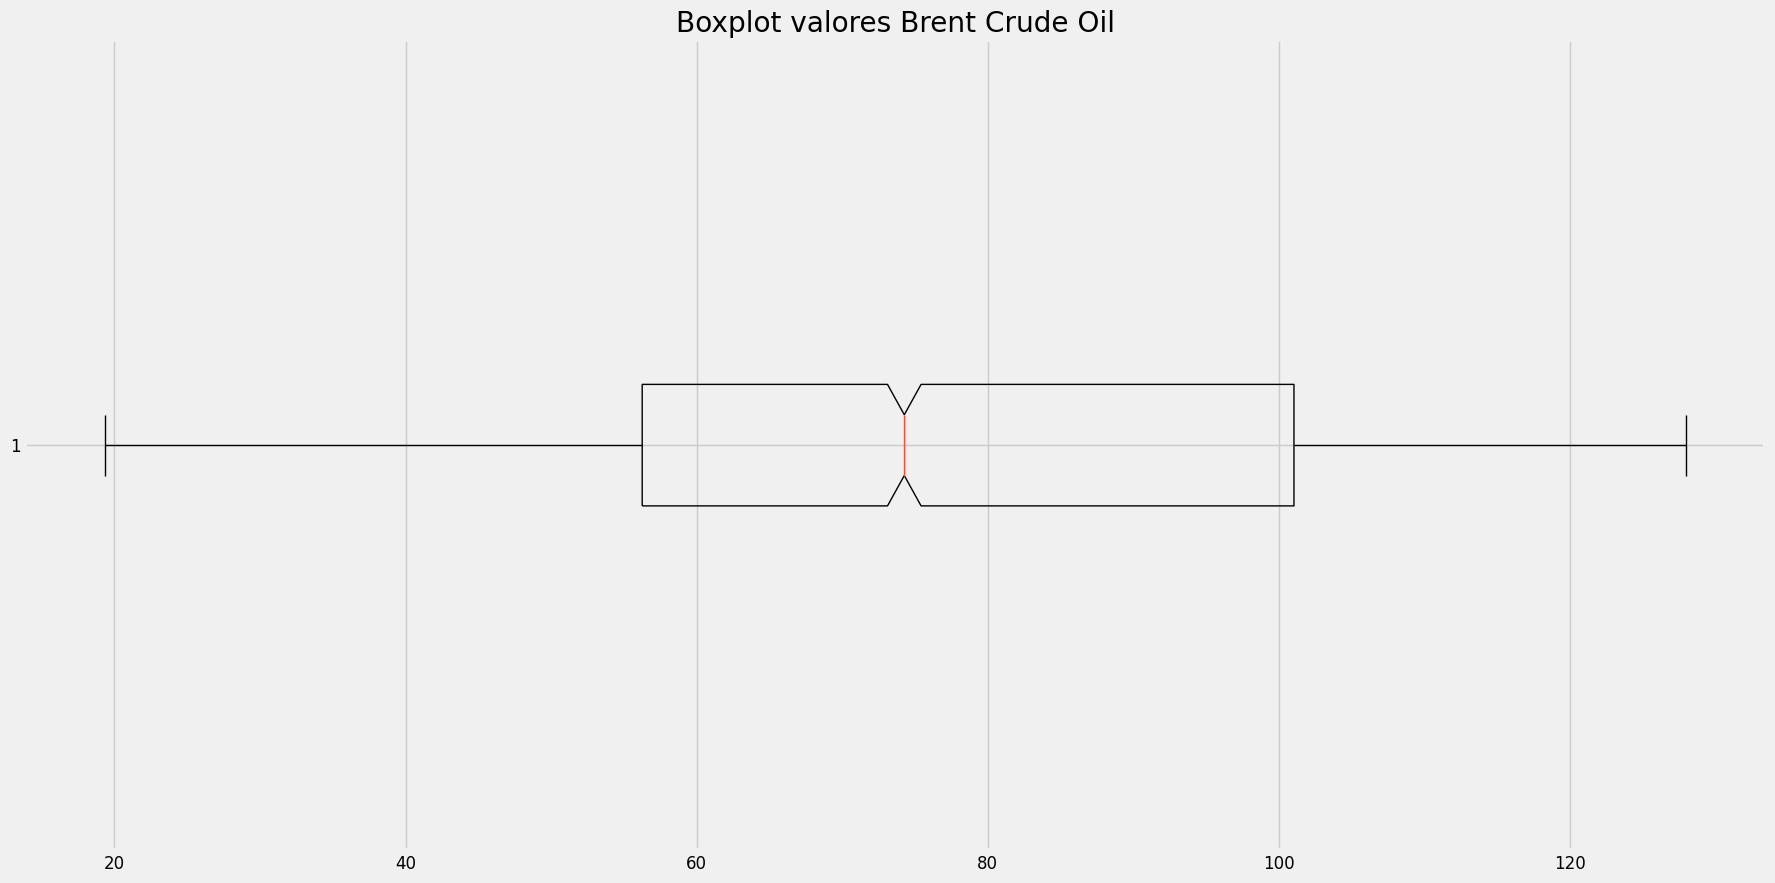

In [18]:
#@ Valores de preços do Brent Crude Oil

plt.boxplot(Dados, notch=True, vert=False)
plt.title("Boxplot valores Brent Crude Oil");

In [19]:
Dados_series.describe()

count   3716.00
mean      76.79
std       24.71
min       19.33
25%       56.26
50%       74.26
75%      101.03
max      127.98
Name: Close, dtype: float64

#6.Setup

A operação de setup no PyCaret é responsável por inicializar o ambiente de treinamento e criar a pipeline de transformação. O setup é um passo obrigatório antes de executar qualquer outra função do PyCaret.

A operação de setup recebe dois parâmetros obrigatórios:

data: um DataFrame Pandas contendo os dados de treinamento.
target: a coluna de destino dos dados de treinamento.
A operação de setup também pode receber uma série de parâmetros opcionais, que são usados para controlar o processo de treinamento e avaliação. Alguns dos parâmetros opcionais mais comuns incluem:

fold: o número de folds de validação cruzada a serem usados.
session_id: um identificador exclusivo para o experimento.
freq: a frequência dos dados.

In [20]:
#Importar a função Setup do Pycaret

from pycaret.time_series import setup

In [21]:
# Operação de setup

setup(data=Dados_series, fh=6, numeric_imputation_target='median', fold=3, session_id=101)

#Sendo que fh=Horizontal Forecast indicando na analise 6 meses para analisar e seasonal_period= mensal)
#fold strategy: formato(fold_strategy='sliding')
#      Sliding - aplicar em series temporais diárias
#      Expanding - aplicar em series mensais, trimestrais, anuais

,Description,Value
0,session_id,101
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(5479, 1)"
5,Transformed data shape,"(5479, 1)"
6,Transformed train set shape,"(5473, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,32.2%
9,Fold Generator,ExpandingWindowSplitter


A sessão ID é um identificador exclusivo para o experimento de séries temporais que você está configurando. Ele é usado para rastrear o experimento e seus resultados.

No código que você forneceu, a sessão ID é definida como 101. Isso significa que esse experimento terá um identificador exclusivo de 101.

Você pode usar a sessão ID para acompanhar o experimento em um ambiente de produção. Por exemplo, você pode usar a sessão ID para identificar o experimento que você está usando para gerar previsões para um determinado cliente.

Aqui estão alguns exemplos de como você pode usar a sessão ID:

Para salvar os resultados do experimento para um arquivo, você pode usar a sessão ID como o nome do arquivo.
Para gerar um relatório do experimento, você pode usar a sessão ID como o ID do experimento.
Para acompanhar o desempenho do experimento ao longo do tempo, você pode usar a sessão ID para identificar o experimento.

In [22]:
#Importar a função Setup do Pycaret

from pycaret.time_series import check_stats

In [23]:
#Checando as estatísticas do modelo

check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,5479.00
1,Summary,Statistics,Transformed,# Missing Values,,0.00
2,Summary,Statistics,Transformed,Mean,,75.97
3,Summary,Statistics,Transformed,Median,,74.26
4,Summary,Statistics,Transformed,Standard Deviation,,20.38
5,Summary,Statistics,Transformed,Variance,,415.38
6,Summary,Statistics,Transformed,Kurtosis,,-0.13
7,Summary,Statistics,Transformed,Skewness,,0.31
8,Summary,Statistics,Transformed,# Distinct Values,,2951.00
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",58885.67


In [24]:
#Importar a função Setup do Pycaret

from pycaret.time_series import compare_models

In [25]:
#Verificando o melhor modelo

best_model = compare_models(n_select=3)

#Dentro do parentesis podes colocar (n_select = 3) para escolher os 3 melhores modelos

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.4318,0.2374,1.3308,1.7402,0.0151,0.0152,0.9397,1.5100
exp_smooth,Exponential Smoothing,0.4372,0.2384,1.3474,1.7476,0.0152,0.0154,0.9386,4.5933
arima,ARIMA,0.5311,0.3075,1.6369,2.2540,0.0183,0.0184,0.8891,1.5100
snaive,Seasonal Naive Forecaster,0.5449,0.3146,1.6794,2.3062,0.0187,0.0189,0.8860,0.1367
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5471,0.3137,1.6862,2.2996,0.0188,0.0189,0.8872,0.3700
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5553,0.3164,1.7115,2.3195,0.0192,0.0196,0.8628,1.5033
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5668,0.2984,1.7472,2.1870,0.0198,0.0201,0.8851,1.2533
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.5997,0.3252,1.8485,2.3835,0.0208,0.0213,0.8680,0.5200
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.6117,0.3559,1.8857,2.6086,0.0209,0.0215,0.8433,3.5200
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.6200,0.3612,1.9110,2.6473,0.0214,0.0215,0.8667,0.3600


Processing:   0%|          | 0/119 [00:00<?, ?it/s]

O SMAPE expressa o erro como uma porcentagem da média dos valores reais e previstos, tornando-o mais interpreto e simétrico, o que significa que erros positivos e negativos têm o mesmo peso na métrica.

Em geral, quanto menor o valor do SMAPE, melhor o desempenho do modelo, pois indica que as previsões estão mais próximas dos valores reais. Portanto, ao usar compare_models() no PyCaret, você pode avaliar os modelos com base no SMAPE e escolher o modelo com o menor valor SMAPE como o melhor modelo para o seu problema de previsão.

In [30]:
from pycaret.time_series import create_model

In [31]:
#Criar o modelo a partir do ETS

ets = create_model('ets')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-10-13,0.6952,0.3658,2.1434,2.6820,0.0242,0.0246,0.8842
1,2023-10-19,0.2800,0.1627,0.8631,1.1927,0.0097,0.0097,0.9750
2,2023-10-25,0.3201,0.1837,0.9858,1.3459,0.0113,0.0111,0.9598
Mean,NaT,0.4318,0.2374,1.3308,1.7402,0.0151,0.0152,0.9397
SD,NaT,0.1870,0.0912,0.5768,0.6689,0.0065,0.0067,0.0397


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#Criar o modelo a partir do Season Naive Forecaster

season_naive_forecaster = create_model('snaive', fold=10)

In [33]:
from pycaret.time_series import plot_model

In [34]:
#Plotando o modelo

plot_model(ets)

In [35]:
from pycaret.time_series import tune_model

In [36]:
#Vamos "tunar" o modelo para verificar se conseguimos um melhor resultado

ets_tuned = tune_model(ets)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-10-13,0.6671,0.3554,2.0566,2.6055,0.0232,0.0236,0.8908
1,2023-10-19,0.2783,0.1633,0.8580,1.1966,0.0097,0.0097,0.9748
2,2023-10-25,0.3449,0.1932,1.0621,1.4152,0.0122,0.0120,0.9555
Mean,NaT,0.4301,0.2373,1.3256,1.7391,0.0150,0.0151,0.9404
SD,NaT,0.1698,0.0844,0.5236,0.6191,0.0058,0.0061,0.0360


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.7s finished


In [37]:
plot_model(ets_tuned)

In [40]:
from pycaret.time_series import blend_models

In [41]:
#Verificando agora para realizar uma avaliação de um blend com os 3 melhores modelos


blender = blend_models(best_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2023-10-13,0.7420,0.4082,2.2877,2.9931,0.0254,0.0260,0.8558
1,2023-10-19,0.2193,0.1385,0.6758,1.0148,0.0076,0.0076,0.9819
2,2023-10-25,0.3748,0.2065,1.1543,1.5129,0.0132,0.0130,0.9492
Mean,NaT,0.4454,0.2511,1.3726,1.8403,0.0154,0.0155,0.9290
SD,NaT,0.2192,0.1145,0.6759,0.8401,0.0074,0.0077,0.0534


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Aplicando o blend com os tres melhores modelos, ainda obtivemos um SMAPE de 0,0155, resultado pior que o modelo "tunado"

In [42]:
from pycaret.time_series import finalize_model

In [43]:
#Finalizar o modelo

final_model = finalize_model(ets_tuned)

Decidimos utilizar o modelo "Blender" por termos obtido o melhor resultado de SMAPE de 0,0679

In [44]:
final_model

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(method='median',
                                                                                                    random_state=101))])),
                                                               ('model',
                                                                AutoETS(seasonal='mul',
                                                                        sp=7))]))])

In [45]:
plot_model(final_model, plot='forecast')

#Proximos 24 meses

In [63]:
#Vamos plotar o modelo de previsão nos próximos 12 meses

plot_model(final_model, plot='forecast', data_kwargs={'fh' : 24})

In [64]:
from pycaret.time_series import predict_model

In [65]:
#Valores de predição do modelo

y_predict = predict_model(final_model, fh=24)

São os valores Preditos para os meses, que podem ser levados para o Power BI

In [50]:
y_predict

,y_pred
2023-11-07,87.64
2023-11-08,87.10
2023-11-09,87.38
2023-11-10,87.95
2023-11-11,73.52
2023-11-12,73.53
2023-11-13,87.11
2023-11-14,87.64
2023-11-15,87.10
2023-11-16,87.38


In [51]:
y_predict = y_predict.reset_index()

In [52]:
y_predict.dtypes

index     period[D]
y_pred      float64
dtype: object

In [53]:
y_predict.set_index('index', drop=True, inplace=True)

In [54]:
y_predict['y_pred'] = y_predict['y_pred'].astype(int)

In [55]:
y_predict.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 24 entries, 2023-11-07 to 2023-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y_pred  24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


In [56]:
y_predict.to_csv('predict_model.csv')

In [58]:
from pycaret.time_series import save_model

In [60]:
#Se quiser salvar o modelo para inserir no Power BI

save_model(final_model,'brent_oil_predict')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('numerical_imputer',
                                                                                             Imputer(method='median',
                                                                                                     random_state=101))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('numerical_imputer',
    

##Vamos realizar a união das tabelas dos dados reais mais os dados preditos para poder subir ao Power BI

In [ ]:
# Renomear colunas da tabela 1

tabela1 = novo_df_pred.rename(columns={'Mes': 'mes_ano', 'QuantidadeReclamacoes': 'qtidade_reclamacoes'})

In [ ]:
tabela1

In [ ]:
tabela2 = y_predict.rename(columns={'index': 'mes_ano', 'y_pred': 'qtidade_reclamacoes'})

In [ ]:
tabela2

In [ ]:
# Concatenar as tabelas
tabelas_concatenadas = pd.concat([tabela1, tabela2])

In [ ]:
tabelas_concatenadas

In [ ]:
tabelas_concatenadas.to_csv('tabelas_concatenadas.csv')